In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('dark')

PCA algorithms aims to preserve the variance in the original data. In other words, PCA tries to preserve the large distances between data points.  

However, when the dataset is complex, data points that are close to each other contain the information more useful for clustering. T-sne allows you to apply differential weight to data points depending on their relative distance. It is called T-SNE because the weights are taken from the probability distribution of T-distribution.  

Unlike PCA, T-SNE is an iterative algorithm. Scikit learn offers highly optimised algorithm with very low computational burden, so it doesn't hurt much to try and see whether T-SNE give a better result than PCA.

# PCA on Mnist dataset

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
target = digits.target
print(data.shape)
print(target.shape)

(1797, 64)
(1797,)


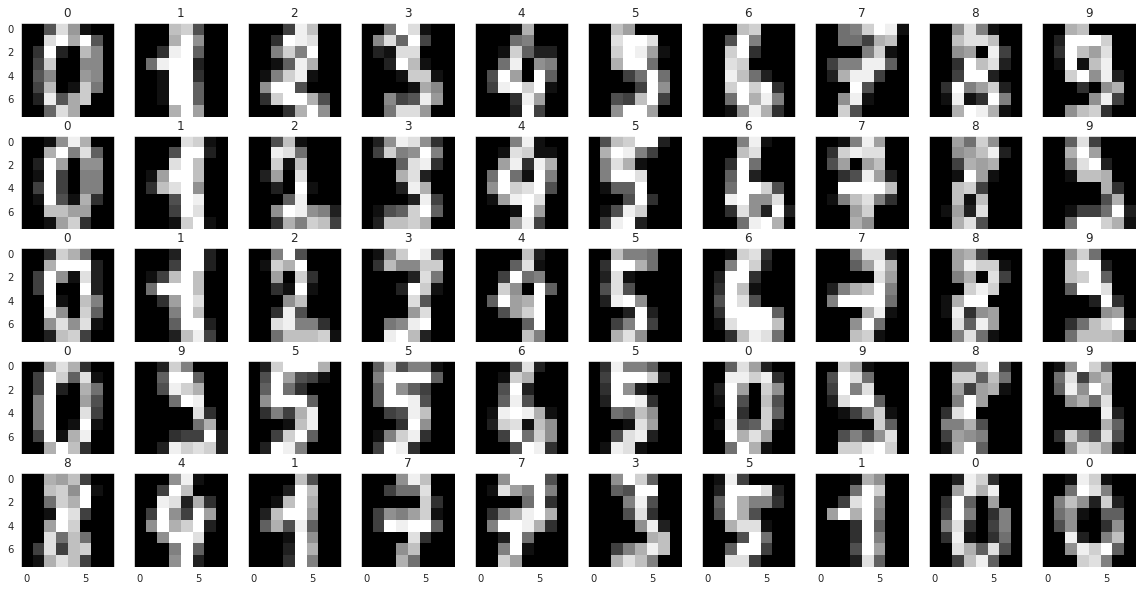

In [4]:
fig, axs = plt.subplots(5, 10, figsize = (20, 10), sharex=True, sharey=True)
axs = axs.flatten()
for idx, digit in enumerate(data[:50]):
    axs[idx].imshow(digit.reshape(8, 8), cmap = 'gray')
    axs[idx].set_title(target[idx]);

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(data)
data_pca = pca.transform(data)
print(data.shape)
print(data_pca.shape)

(1797, 64)
(1797, 2)


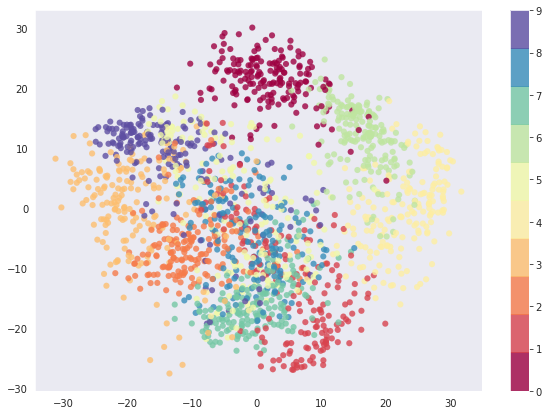

In [7]:
plt.figure(figsize = (10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = target, cmap=plt.cm.get_cmap('Spectral', 10), alpha = 0.8, linewidths=0.1)
plt.colorbar();

# T-sne

In [8]:
from sklearn.manifold import TSNE

In [43]:
# hyper parameters

# n_components define the number of dimensions that you want to transform on
n_components = 2

# The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. 
#Consider selecting a value between 5 and 50. Different values can result in significantly different results 
perplexity = 30

In [42]:
tsne = TSNE(n_components=n_components,
            init='random', 
            perplexity=perplexity,
            random_state=42)
X_tsne = tsne.fit_transform(X = data, y = target)

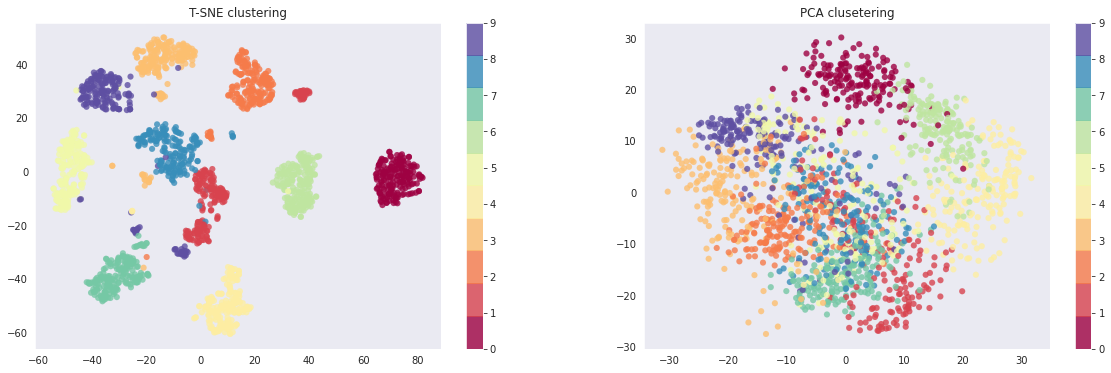

In [39]:
fig, axs = plt.subplots(1,2, figsize = (20, 6))
plot_tsne = axs[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c = target, cmap=plt.cm.get_cmap('Spectral', 10), alpha = 0.8, linewidths=0.1)
plt.colorbar(plot_tsne,ax=axs[0])

plot_pca = axs[1].scatter(data_pca[:, 0], data_pca[:, 1], c = target, cmap=plt.cm.get_cmap('Spectral', 10), alpha = 0.8, linewidths=0.1)
plt.colorbar(plot_pca, ax=axs[1])
axs[0].set_title('T-SNE clustering')
axs[1].set_title('PCA clusetering');

Apparently, T-SNE gives a much better clustering result. 

**One thing to look out for!**

When your original dataset is highly noisy, T-SNE algorithm can struggle to identify the manifold. Therefore, it is recommended to run PCA on the original dataset to project the dataset on relatively higher dimension (scikit learn recommends 50). And then apply T-SNE to project the dataset to 2 or 3 dimensions for visualisation.